In [2]:
from scipy.optimize import curve_fit
import numpy as np
from numpy import e, pi, log, sin, cos, tan, sqrt
import matplotlib.pyplot as plt

# DEFININDO AS FUNÇÕES
Funções de variável $x$ com outras constantes que alteram seu gráfico por translação, compressão e espelhamento

In [3]:
def fitData(xDados, yDados):
    xDados = np.array(xDados)
    yDados = np.array(yDados)

    def funcaoLinear(x, a, b):
        return a * (x) + b

    def funcaoExponencial(x, Yo, k, b):
        return Yo * e ** (-k * (x + b))

    def funcaoExponencialSuporte(x, Yo, M, k):
        A = (M - Yo) / Yo
        return M / (1 + A * e ** (-k * x))

    def funcaoLogaritmica(x, a, b, c):
        return a * log(abs(x + b)) + c

    def funcaoQuadratica(x, a, b, c):
        return a * (x ** 2) + b * x + c

    def funcaoCubica(x, a, b, c, d):
        return a * (x ** 3) + b * (x ** 2) + c * x + d

    def funcaoQuadrupla(x, a, b, c, d, e):
        return a * (x ** 4) + b * (x ** 3) + c * (x ** 2) + d * x + e

    def funcaoQuintupla(x, a, b, c, d, e, f):
        return a * (x ** 5) + b * (x ** 4) + c * (x ** 3) + d * (x ** 2) + e * x + f

    def funcaoPotencia(x, a, b, c):
        return a * (x ** b) + c

    def funcaoRaiz(x, a, b, c, d):
        return a * sqrt(abs(b * x + c)) + d

    def funcaoSeno(x, a, b, c, d):
        return a * sin(b * (x + c)) + d

    def funcaoTangente(x, a, b, c, d):
        return a * tan(b * (x - d)) + c

    def funcaoHiperbole(x, a, b, c, n, d):
        return (a) / (b * x + c)**n + d

    def funcaoNormal(x, a, media, desvio):
        return (a) / (desvio * ((2 * pi) ** (0.5))) * (e ** (-1 * ((x - media) ** 2) / (2 * (desvio ** 2))))

    def FuncaoSenoideQuadratica(x, a, b, c, d, e, f, g):
        return a * (x + b) ** 2 - c * (x + d) * np.cos(e * x) + f * x + g

    def PolinomioGrau13(x, a, b, c, d, e, f, g, h, i, j, k, l, m, n):
        return a * (x ** 13) + b * (x ** 12) + c * (x ** 11) + d * (x ** 10) + e * (x ** 9) + f * (x ** 8) + g * (x ** 7) \
               + h * (x ** 6) + i * (x ** 5) + j * (x ** 4) + k * (x ** 3) + l * (x ** 2) + m * x + n

    listaFuncoes = {
        'Função Linear': funcaoLinear,
        'Função Exponencial': funcaoExponencial,
        'Função Exponencial Suporte': funcaoExponencialSuporte,
        'Função Logaritmica': funcaoLogaritmica,
        'Função Quadratica': funcaoQuadratica,
        'Função Cubica': funcaoCubica,
        'Polinômio Grau 4': funcaoQuadrupla,
        'Polinômio Grau 5 ': funcaoQuintupla,
        'Função Potência': funcaoPotencia,
        'Função Raiz': funcaoRaiz,
        'Função Seno': funcaoSeno,
        'Função Tangente': funcaoTangente,
        'Função Hiperbólica': funcaoHiperbole,
        'Função Normal': funcaoNormal,
        'Função Senoide Quadrática': FuncaoSenoideQuadratica,
        'Polinomio Grau 13': PolinomioGrau13
    }

    for nome, funcao in listaFuncoes.items():
        try:
            for nome, funcao in listaFuncoes.items():          # MÁXIMO DE ITERAÇÕES
    coeficientes = curve_fit(funcao, xDados, yDados, maxfev=1000000)
    
    xFuncao = np.linspace(min(xDados), max(xDados), 10000)
    yFuncao = funcao(xFuncao, *coeficientes[0])  # RECEBE UMA LISTA COM OS VALORES F(XDados)
    
    plt.scatter(xDados, yDados, color='Orange')
    plt.plot(xFuncao, yFuncao, color='blue', linewidth=2.5)
    plt.title(nome, fontsize=16)
    plt.xlabel('Valores de X')
    plt.ylabel('Valores de Y')
    plt.show()
    
    print('COEFICIENTES: ', list(coeficientes[0]))
        except:
            print('FIT ERROR')

# BASE DE DADOS
Importando a base de dados com os valores $x$ e $y$ para visualizarmos o seu gráfico. Os dados de $x$ devem estar em ordem crescente (se quisermos usar o gráfico de linha) para organizar a tabela.

In [4]:
import pandas as pd

df = pd.read_csv(r'Arquivos\advertising.csv')
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Colocando $xDados$ em ordem crescente a fazendo $yDados$ acompanhar essa ordem de acordo com $x$

In [6]:
xDados = df['TV']
yDados = df['Vendas']

# DICIONÁRIO DE OBJETOS
Criamos um dicionário que guardará o nome da função (keys) e a sua respectiva função (values) para podermos imprimir usando um laço for

In [7]:
listaFuncoes = {
    'Função Linear'             : funcaoLinear,
    'Função Exponencial'        : funcaoExponencial,
    'Função Logaritmica'        : funcaoLogaritmica,
    'Função Quadratica'         : funcaoQuadratica,
    'Quadratica com Modulo'     : funcaoQuadraticaModulo,
    'Função Cubica'             : funcaoCubica,
    'Polinômio Grau 4'          : funcaoQuadrupla,
    'Polinômio Grau 5 '         : funcaoQuintupla, 
    'Função Potência'           : funcaoPotencia,
    'Função Raiz'               : funcaoRaiz,
    'Função Seno'               : funcaoSeno,
    'Função Tangente'           : funcaoTangente,
    'Função Hipérbole'          : funcaoHiperbole,
    'Função Normal'             : funcaoNormal,
    'Função Senoide Quadrática' : FuncaoSenoideQuadratica,
    'Polinomio Grau 13'         : PolinomioGrau13
}

# GRÁFICOS
Plotando o gráfico das funções ajustadas com o curve_fit, os coeficientes a, b, c, d... serão mostrados em baixo do gráfico. 

- nome $\,\,\, \rightarrow \,\,\,$ É o nome da função definida e armazenada no dicionário que está no loop for
- funcao $\,\,\, \rightarrow \,\,\,$ É a função definida e armazenada no dicionário que está no loop for
- linspace $\,\,\, \rightarrow \,\,\,$ Pega o intervalo entre o maior e menor valor da lista $xDados$ e divide eles igualmente em 10000 valores
- yFuncao $\,\,\, \rightarrow \,\,\,$ Recebe uma lista com $f(xFuncao)$ (valores da lista igualmente espaçada com mais pontos)

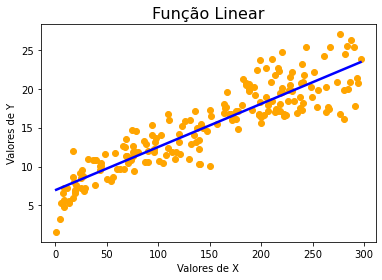

COEFICIENTES:  [0.055464770467772415, 6.974821488492574]


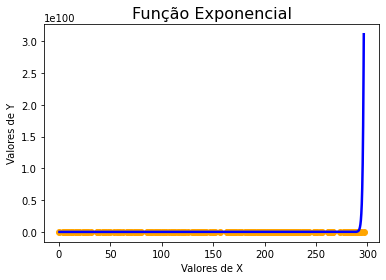

COEFICIENTES:  [5.855387176329756e-29, 1.0000000152986985, -1.0382597654303016e-06]


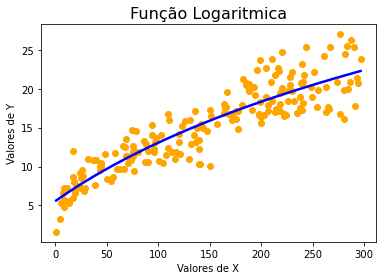

COEFICIENTES:  [17.875210089332377, 191.7144217471738, -88.3833360687123]


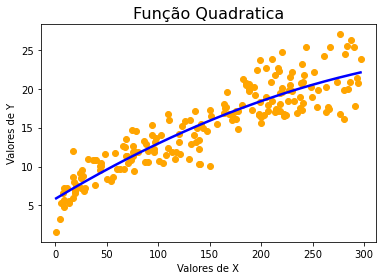

COEFICIENTES:  [-8.322112047527838e-05, 0.07944475037812722, 5.8584620979666235]


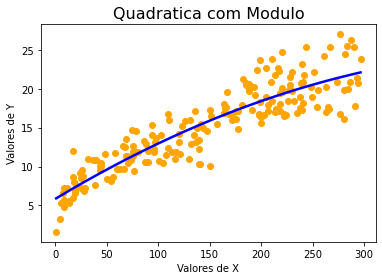

COEFICIENTES:  [-8.322112047527838e-05, 0.07944475037812722, 5.8584620979666235]


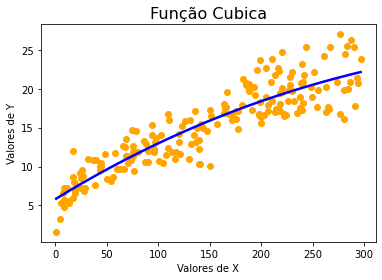

COEFICIENTES:  [3.1818061485366366e-08, -9.73115544915717e-05, 0.0811103501496388, 5.818831948125058]


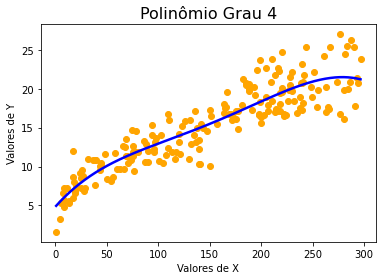

COEFICIENTES:  [-9.097480732114599e-09, 5.4520324736481115e-06, -0.0011328775195999727, 0.14889631413980112, 4.848492817236005]


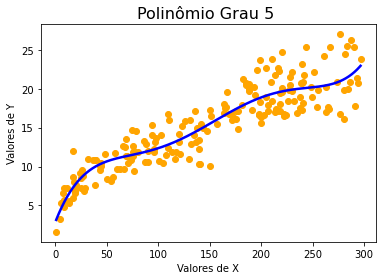

COEFICIENTES:  [2.0254305724509939e-10, -1.5939773647512286e-07, 4.5177573132754775e-05, -0.00557990330917786, 0.3398845673453231, 2.9106593303928396]


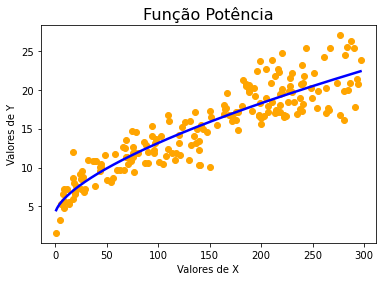

COEFICIENTES:  [0.4543130036331834, 0.6484886711014828, 4.162896087864463]


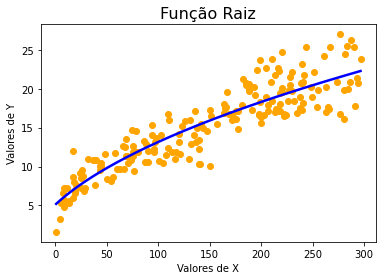

COEFICIENTES:  [1.2328074452013875, 1.2365631415008178, 38.53642504845987, -2.534227782879]


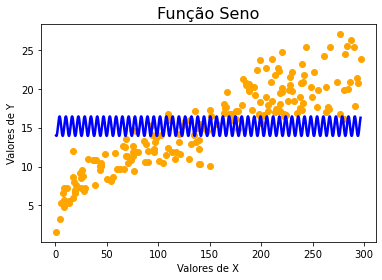

COEFICIENTES:  [-1.2504643361483463, 1.0296164121209792, -5.519026314153373, 15.18860451778804]


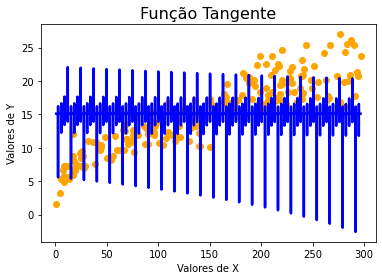

COEFICIENTES:  [-0.029975954897233287, 0.9998350557857651, 15.095295370048467, 0.9656140124313886]


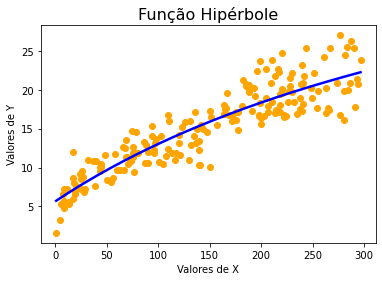

COEFICIENTES:  [9177.880700305863, -0.3904134739303536, -201.8039219259306, 51.15006207774065]


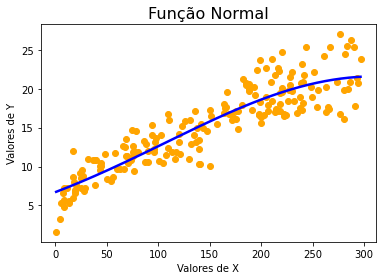

COEFICIENTES:  [11004.932358634285, 310.7357753598359, 203.3510566091946]


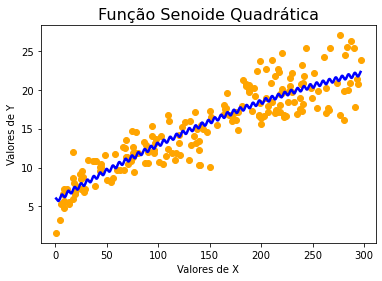

COEFICIENTES:  [-8.715685933328176e-05, -31.95778699457019, -9.023562042459361e-07, 312400.4759711464, 1.0153001504662156, 0.07530389403509384, 5.8359873847484165]


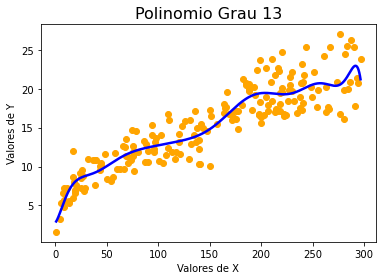

COEFICIENTES:  [-7.001591320384092e-26, 1.3070790385654594e-22, -1.0796284077072692e-19, 5.1986133679547314e-17, -1.6185391599261154e-14, 3.415472261778519e-12, -4.977385513444685e-10, 5.0027974286925166e-08, -3.395161402087998e-06, 0.00014814191914802266, -0.0037499733034817503, 0.041480424731043145, 0.16367969081187655, 2.810734392749365]


In [8]:
for nome, funcao in listaFuncoes.items():          # MÁXIMO DE ITERAÇÕES
    coeficientes = curve_fit(funcao, xDados, yDados, maxfev=1000000)
    
    xFuncao = np.linspace(min(xDados), max(xDados), 10000)
    yFuncao = funcao(xFuncao, *coeficientes[0])  # RECEBE UMA LISTA COM OS VALORES F(XDados)
    
    plt.scatter(xDados, yDados, color='Orange')
    plt.plot(xFuncao, yFuncao, color='blue', linewidth=2.5)
    plt.title(nome, fontsize=16)
    plt.xlabel('Valores de X')
    plt.ylabel('Valores de Y')
    plt.show()
    
    print('COEFICIENTES: ', list(coeficientes[0]))